In [1]:
# pytho=3.6.5
# keras=2.2.4
# tensorflow=1.11.0
# pillow=5.1.0
# numpy=1.15.2

# Load data

In [3]:
from keras.datasets import mnist
from PIL import Image
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt

In [4]:
# --------------------- processing data ----------------------
# loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_classes = 10

# form one hot label
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def resize_image(data):
    img = Image.fromarray(data.reshape(28,28))
    img = img.resize(size=(32,32))
    return np.array(img)

# preprocessing: resize to 32,32. scale to [0,1]
X_train = np.array([resize_image(x) for x in X_train])
X_test = np.array([resize_image(x) for x in X_test])

11493376/11490434 [==============================] - 1s 0us/step


# Build NN

In [5]:
# ------------------- create model -------------------
img_rows, img_cols = 32, 32
def build_model(regulaizer=None):
    model = Sequential()
    # add model layers
    # 32, 32
    channel_multiply = 64

    model.add(Conv2D(1 * channel_multiply, (3, 3), activation='relu', padding='same',
                     input_shape=(32,32,1), kernel_regularizer=regulaizer))
    # 32, 32
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 16, 16
    model.add(Conv2D(2 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 16, 16
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 8, 8
    model.add(Conv2D(4 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 8, 8
    model.add(Conv2D(4 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 8, 8
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 4, 4
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 4, 4
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 4, 4
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 2, 2
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 2, 2
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 2, 2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 1, 1
    model.add(Flatten())
    model.add(Dense(4 * channel_multiply, kernel_regularizer=regulaizer))
    model.add(Dense(4 * channel_multiply, kernel_regularizer=regulaizer))
    # model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return(model)

In [6]:
# plot
def plot_img(Y1, Y2, title, legend =['train', 'test']):
    plt.clf()
    plt.plot(Y1)
    plt.plot(Y2)
    plt.title(title)
    plt.ylabel(title)
    plt.xlabel('epoch')
    plt.legend(legend, loc='upper left')
    plt.savefig(title + '.png')



# training

In [9]:
model = build_model()
sgd = optimizers.SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5)
ada = optimizers.Adadelta()
n = X_train.shape[0]
m = X_test.shape[0]
X_train_ = X_train.reshape(n,32,32,1).astype('float32')
X_train_ /= 255.0
X_test_ = X_test.reshape(m, 32,32,1).astype('float32') / 255.0
epoches = 5
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,
                                         write_graph=True, write_images=True)
history = model.fit(X_train_, y_train, validation_split=0.0,validation_data=(X_test_, y_test),
                    epochs=epoches, batch_size=32, callbacks=[tbCallBack], verbose=True)

print(history.history['acc'][-1],'\t',history.history['loss'][-1],'\t',
      history.history['val_acc'][-1],'\t',history.history['val_loss'][-1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 41s 691us/step - loss: 0.1997 - acc: 0.9322 - val_loss: 0.0560 - val_acc: 0.9842
Epoch 2/5
60000/60000 [==============================] - 42s 693us/step - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0339 - val_acc: 0.9899
Epoch 3/5
60000/60000 [==============================] - 41s 689us/step - loss: 0.0305 - acc: 0.9916 - val_loss: 0.0337 - val_acc: 0.9914
Epoch 4/5
60000/60000 [==============================] - 42s 698us/step - loss: 0.0206 - acc: 0.9940 - val_loss: 0.0337 - val_acc: 0.9911
Epoch 5/5
60000/60000 [==============================] - 42s 694us/step - loss: 0.0150 - acc: 0.9957 - val_loss: 0.0247 - val_acc: 0.9935
0.9956666666666667 	 0.014977018427803584 	 0.9935 	 0.024735702369818865


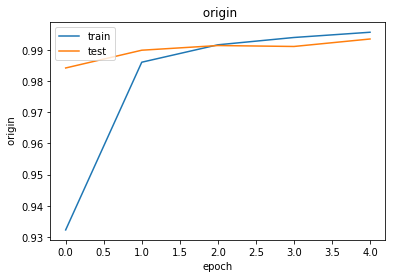

In [10]:
plot_img(history.history['acc'], history.history['val_acc'], " origin")

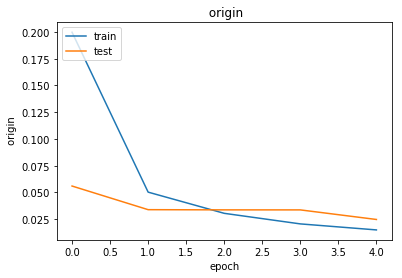

In [11]:
plot_img(history.history['loss'], history.history['val_loss'], " origin")

## Rotation & blur test

In [12]:
from matplotlib import pyplot as plt

def rotation_imgs(X, degree):
    size = 32,32
    ans = []
    for x in X:
        img = Image.fromarray(x.reshape(size), mode='L')
        ans.append(np.array(img.rotate(degree)))
    #print(np.array(ans).shape)
    return np.array(ans)

from PIL import ImageFilter
def blur_imgs(X, radius):
    size = 32,32
    ans = []
    for x in X:
        img = Image.fromarray(x.reshape(size), mode='L')
        ans.append(np.array(img.filter(ImageFilter.GaussianBlur(radius=radius))))
    return np.array(ans) 

In [13]:
X_test[0]
m = 10000

rotation_loss = []
rotation_acc = []
for rotation in range(-45,50,5):
    X_test_ = rotation_imgs(X_test, rotation).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    rotation_loss.append(result[0])
    rotation_acc.append(result[1])

blur_loss = []
blur_acc = []
for blur in range(8):
    X_test_ = blur_imgs(X_test, blur).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    blur_loss.append(result[0])
    blur_acc.append(result[1])

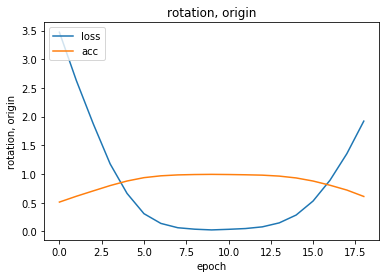

In [14]:
plot_img(rotation_loss, rotation_acc,'rotation, origin', legend=['loss','acc'])

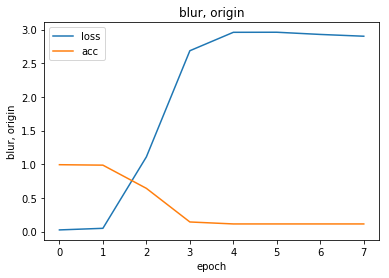

In [15]:
plot_img(blur_loss, blur_acc,'blur, origin', legend=['loss','acc'])

# L2 normalization

In [16]:
model = build_model(regulaizer=keras.regularizers.l2(0.001))
sgd = optimizers.SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5)
ada = optimizers.Adadelta()
n = X_train.shape[0]
m = X_test.shape[0]
X_train_ = X_train.reshape(n,32,32,1).astype('float32')
X_train_ /= 255.0
epoches = 5
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,
                                         write_graph=True, write_images=True)
history = model.fit(X_train_, y_train, validation_split=0.0,validation_data=(X_test_, y_test),
                    epochs=epoches, batch_size=32, callbacks=[tbCallBack], verbose=True)

print(history.history['acc'][-1],'\t',history.history['loss'][-1],'\t',
      history.history['val_acc'][-1],'\t',history.history['val_loss'][-1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 46s 761us/step - loss: 0.7243 - acc: 0.8856 - val_loss: 2.6831 - val_acc: 0.0974
Epoch 2/5
60000/60000 [==============================] - 46s 763us/step - loss: 0.2826 - acc: 0.9764 - val_loss: 2.6046 - val_acc: 0.0750
Epoch 3/5
60000/60000 [==============================] - 45s 757us/step - loss: 0.2024 - acc: 0.9808 - val_loss: 2.6419 - val_acc: 0.0974
Epoch 4/5
60000/60000 [==============================] - 46s 759us/step - loss: 0.1710 - acc: 0.9843 - val_loss: 2.6748 - val_acc: 0.1176
Epoch 5/5
60000/60000 [==============================] - 46s 760us/step - loss: 0.1533 - acc: 0.9856 - val_loss: 2.7373 - val_acc: 0.1135
0.9855833333333334 	 0.15333635734319687 	 0.1135 	 2.7373120574951173


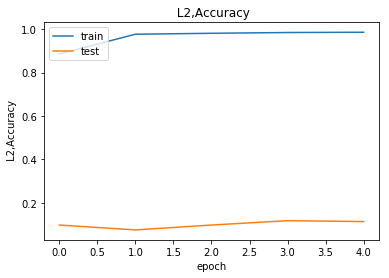

In [17]:
plot_img(history.history['acc'], history.history['val_acc'], " L2,Accuracy")

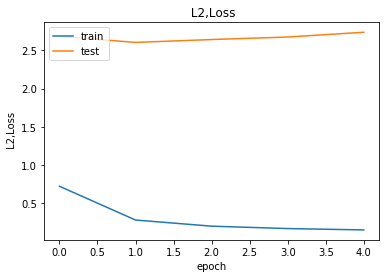

In [18]:
plot_img(history.history['loss'], history.history['val_loss'], " L2,Loss")

## rotation & blur test

In [19]:
X_test[0]
m = 10000

rotation_loss = []
rotation_acc = []
for rotation in range(-45,50,5):
    X_test_ = rotation_imgs(X_test, rotation).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    rotation_loss.append(result[0])
    rotation_acc.append(result[1])

blur_loss = []
blur_acc = []
for blur in range(8):
    X_test_ = blur_imgs(X_test, blur).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    blur_loss.append(result[0])
    blur_acc.append(result[1])

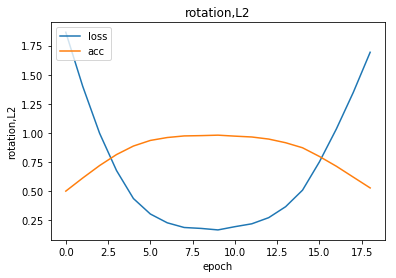

In [20]:
plot_img(rotation_loss, rotation_acc,'rotation,L2', legend=['loss','acc'])

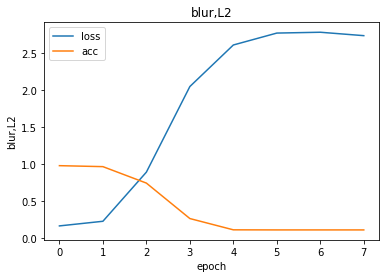

In [21]:
plot_img(blur_loss, blur_acc,'blur,L2', legend=['loss','acc'])

# data augmentation

In [22]:
import random
from tqdm import trange
batch_size = 60
X_train_aug = np.array([X_train[0]])
y_train_aug = np.array([y_train[0]])
n = 60000
l = 0
for i in trange(6000):
    rotation = int(random.random()*90) - 45
    r = l + batch_size
    if r > n:
        r = n
    #print(X_train_aug.shape)
    X_train_aug = np.concatenate((X_train_aug, rotation_imgs(X_train[l:r], rotation)), axis=0)
    y_train_aug = np.concatenate((y_train_aug, y_train[l:r]), axis=0)
    l = r
    if r == n:
        l = 0

for i in trange(4000):
    blur = int(random.random()*8)
    r = l + batch_size
    if r > n:
        r = n
    X_train_aug = np.concatenate((X_train_aug, blur_imgs(X_train[l:r], rotation)), axis=0)
    y_train_aug = np.concatenate((y_train_aug, y_train[l:r]), axis=0)
    l = r
    if r == n:
        l = 0     
n_ = len(X_train_aug)


100%|██████████| 4000/4000 [44:52<00:00,  1.13it/s]


In [23]:
X_train_aug_ = np.array(X_train_aug).reshape(n_, 32,32,1).astype("float32")
y_train_aug = np.array(y_train_aug)

In [26]:
model = build_model()
sgd = optimizers.SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5)
ada = optimizers.Adadelta()
n = X_train.shape[0]
m = X_test.shape[0]
X_train_ = X_train.reshape(n,32,32,1).astype('float32')
X_train_ /= 255.0
epoches = 5
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,
                                         write_graph=True, write_images=True)
history = model.fit(X_train_aug_, y_train_aug, validation_split=0.0,validation_data=(X_test_, y_test),
                    epochs=epoches, batch_size=32, callbacks=[tbCallBack], verbose=True)

print(history.history['acc'][-1],'\t',history.history['loss'][-1],'\t',
      history.history['val_acc'][-1],'\t',history.history['val_loss'][-1])

Train on 600001 samples, validate on 10000 samples
Epoch 1/5
600001/600001 [==============================] - 406s 677us/step - loss: 0.5298 - acc: 0.8175 - val_loss: 7.2126 - val_acc: 0.1135
Epoch 2/5
600001/600001 [==============================] - 405s 676us/step - loss: 0.3274 - acc: 0.8881 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/5
600001/600001 [==============================] - 405s 676us/step - loss: 0.2823 - acc: 0.9031 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/5
600001/600001 [==============================] - 405s 674us/step - loss: 0.2557 - acc: 0.9115 - val_loss: 12.5479 - val_acc: 0.1283
Epoch 5/5
600001/600001 [==============================] - 405s 675us/step - loss: 0.2329 - acc: 0.9188 - val_loss: 14.2887 - val_acc: 0.1135
0.9187701353831077 	 0.232949796609544 	 0.1135 	 14.288691453552246


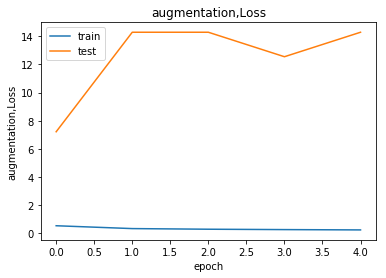

In [27]:
plot_img(history.history['loss'], history.history['val_loss'], "augmentation,Loss")

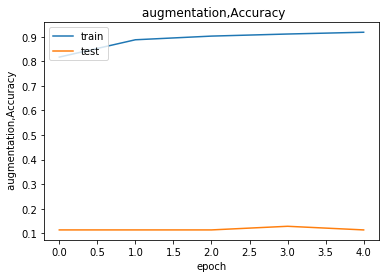

In [28]:
plot_img(history.history['acc'], history.history['val_acc'], " augmentation,Accuracy")

In [29]:
X_test[0]
m = 10000

rotation_loss = []
rotation_acc = []
for rotation in range(-45,50,5):
    X_test_ = rotation_imgs(X_test, rotation).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    rotation_loss.append(result[0])
    rotation_acc.append(result[1])

blur_loss = []
blur_acc = []
for blur in range(8):
    X_test_ = blur_imgs(X_test, blur).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    blur_loss.append(result[0])
    blur_acc.append(result[1])

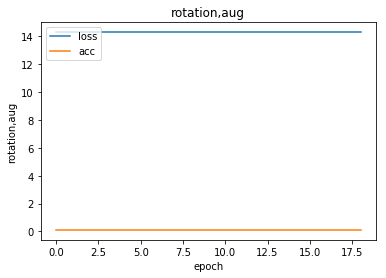

In [30]:
plot_img(rotation_loss, rotation_acc,'rotation,aug', legend=['loss','acc'])

In [31]:
rotation_loss

[14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246]

In [32]:
rotation_acc

[0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135,
 0.1135]

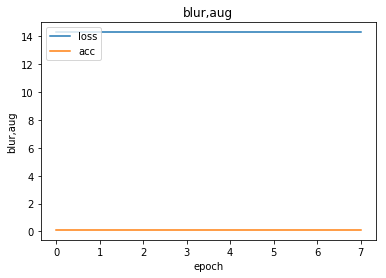

In [33]:
plot_img(blur_loss, blur_acc,'blur,aug', legend=['loss','acc'])

In [34]:
blur_loss

[14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246,
 14.288691453552246]

In [35]:
blur_acc

[0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135]